In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


# Description
Task 4: Loan Approval Prediction Description 
Description:
 * Dataset (Recommended): Loan-Approval-Prediction-Dataset (Kaggle)
 * Build a model to predict whether a loan application will be approved
 * Handle missing values and encode categorical features
 * Train a classification model and evaluate performance on imbalanced data
 * Focus on precision, recall, and F1-score
 
 Tools & Libraries:
 Python
 Pandas
 Scikit-learn
 
 Covered Topics:
 Binary classification |  Imbalanced data
 
 Bonus: 
 Use SMOTE or other techniques to address class imbalance. 
Try logistic regression vs. decision tree

# Import Libraries

In [9]:
!pip install scikit-learn==1.2.2 imbalanced-learn==0.10.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 53.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.7.1
    Uninstalling scikit-learn-1.7.1:
      Successfully uninstalled scikit-learn-1.7.1
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.14.0
    Uninstalling imbalanced-learn-0.14.0:
      Successfully uninstalled imbalanced-learn-0.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.


In [10]:
import sklearn
import imblearn
print("scikit-learn:", sklearn.__version__)
print("imbalanced-learn:", imblearn.__version__)

scikit-learn: 1.2.2
imbalanced-learn: 0.10.1


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE

# Load Dataset

In [12]:
df = pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
print(f'rows: {len(df)}')
print(f'cols: {len(df.columns)}')

rows: 4269
cols: 13


In [14]:
print("\nColumns:", df.columns.tolist())


Columns: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [16]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

# Data Cleaning

In [18]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

In [19]:
# Drop loan_id (not useful for prediction)
df = df.drop("loan_id", axis=1)

In [20]:
# Handle missing values (fill numeric with median, categorical with mode)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# Encode Categorical Variables

In [21]:
cat_cols = ["education", "self_employed", "loan_status"]

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("\nEncoded Sample:")
df.head()


Encoded Sample:


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


# Features & Target

In [22]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [23]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression

In [25]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [26]:
print("\n--- Logistic Regression ---")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


--- Logistic Regression ---
Accuracy: 0.9227166276346604
Precision: 0.9158576051779935
Recall: 0.8761609907120743
F1 Score: 0.8955696202531646
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854



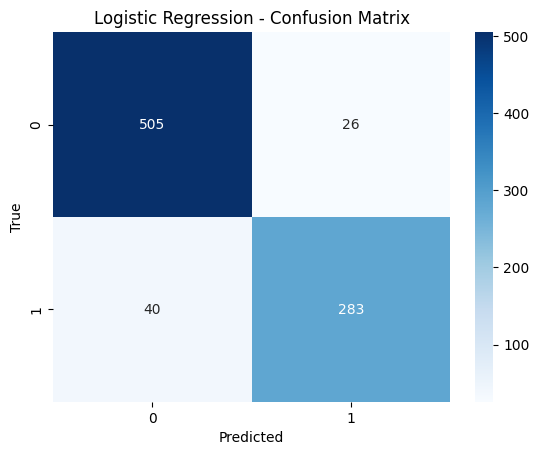

In [27]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Decision Tree

In [28]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [29]:
print("\n--- Decision Tree ---")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


--- Decision Tree ---
Accuracy: 0.9765807962529274
Precision: 0.9495548961424333
Recall: 0.9907120743034056
F1 Score: 0.9696969696969697
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       531
           1       0.95      0.99      0.97       323

    accuracy                           0.98       854
   macro avg       0.97      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



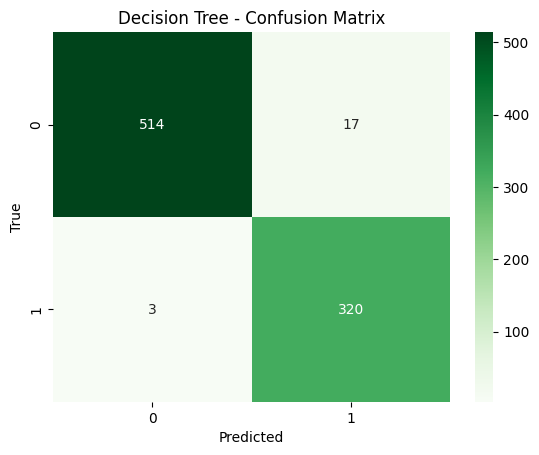

In [30]:
# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Greens")
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Bonus: Handle Imbalanced Data with SMOTE

In [31]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [32]:
print("\nClass Distribution before SMOTE:", np.bincount(y_train))
print("Class Distribution after SMOTE:", np.bincount(y_res))


Class Distribution before SMOTE: [2125 1290]
Class Distribution after SMOTE: [2125 2125]


In [33]:
# Retrain Logistic Regression with SMOTE
log_reg_sm = LogisticRegression(max_iter=1000, random_state=42)
log_reg_sm.fit(X_res, y_res)
y_pred_sm = log_reg_sm.predict(X_test)

In [34]:
print("\n--- Logistic Regression with SMOTE ---")
print("Accuracy:", accuracy_score(y_test, y_pred_sm))
print("Precision:", precision_score(y_test, y_pred_sm))
print("Recall:", recall_score(y_test, y_pred_sm))
print("F1 Score:", f1_score(y_test, y_pred_sm))
print(classification_report(y_test, y_pred_sm))


--- Logistic Regression with SMOTE ---
Accuracy: 0.9320843091334895
Precision: 0.9076923076923077
Recall: 0.913312693498452
F1 Score: 0.9104938271604938
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       531
           1       0.91      0.91      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854

